<a href="https://colab.research.google.com/github/YUFULEO/Regression-Analysis-and-Twitter-Data/blob/main/ECE219_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Regression Analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
diamonds = pd.read_csv('/content/gdrive/MyDrive/diamonds_ece219.csv', index_col=0)

In [ ]:
diamonds.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


## Before Training

### Handling Categorical Features

In [ ]:
#diamonds = diamonds[(diamonds['girdle_min'] != 'unknown') & (diamonds['girdle_max'] != 'unknown')]

In [ ]:
cut_order = {'Very Good': 1, 'Excellent': 2}
color_order = {
  'M': 1, 'L': 2, 'K': 3, 'J': 4, 'I': 5,
  'H': 6, 'G': 7, 'F': 8, 'E': 9, 'D': 10
}
clarity_order = {
  'I3': 1, 'I2': 2, 'I1': 3, 'SI2': 4, 'SI1': 5,
  'VS2': 6, 'VS1': 7, 'VVS2': 8, 'VVS1': 9, 'IF': 10
}
symmetry_order = {'Very Good': 1, 'Excellent': 2}
polish_order = {'Very Good': 1, 'Excellent': 2}

girdle_order = {
   'unknown': 0, 'XTN': 1, 'VTN': 2, 'TN': 3, 'STN': 4,
  'M': 5, 'STK': 6, 'TK': 7,
  'VTK': 8, 'XTK': 9,
}


diamonds_encoded = diamonds.copy()

diamonds_encoded['cut'] = diamonds_encoded['cut'].map(cut_order)
diamonds_encoded['color'] = diamonds_encoded['color'].map(color_order)
diamonds_encoded['clarity'] = diamonds_encoded['clarity'].map(clarity_order)
diamonds_encoded['symmetry'] = diamonds_encoded['symmetry'].map(symmetry_order)
diamonds_encoded['polish'] = diamonds_encoded['polish'].map(polish_order)
diamonds_encoded['girdle_min'] = diamonds_encoded['girdle_min'].map(girdle_order)
diamonds_encoded['girdle_max'] = diamonds_encoded['girdle_max'].map(girdle_order)

In [ ]:
diamonds_encoded.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,9,8,0.09,2,1,1,62.7,59.0,2.85,2.87,1.79,5,5,200
1,9,8,0.09,1,1,1,61.9,59.0,2.84,2.89,1.78,6,6,200
2,9,8,0.09,2,1,1,61.1,59.0,2.88,2.90,1.77,3,5,200
3,9,8,0.09,2,1,1,62.0,59.0,2.86,2.88,1.78,5,6,200
4,9,8,0.09,1,1,2,64.9,58.5,2.79,2.83,1.82,6,6,200


### Data Inspection

#### Question 1.1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

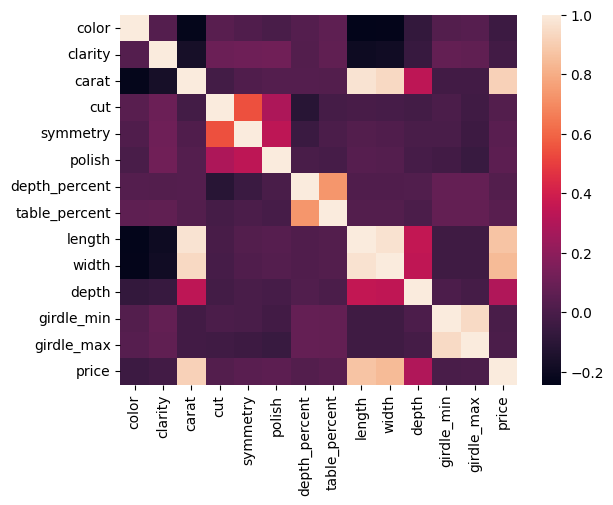

In [ ]:
sns.heatmap(diamonds_encoded.corr())

**<font color=blue size=4>Question 1.1**

**Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report
which features have the highest absolute correlation with the target variable. In
the context of either dataset, describe what the correlation patterns suggest.**


We already plot a heatmap of the Pearson correlation matrix of the dataset columns. The target variable is price because we need to predict the price according to the characteristics. We can know from the heatmap that the carat, length, width and depth have the highest absolute correlation with the target variable (price). The correlation patterns suggest that the weight and size of the diamond is more related to the price. But other features, such as cut, color, clarity are less related to the price. In other words, the size and weight of a diamond is more related to the price compare to the quality.

#### Question 1.2

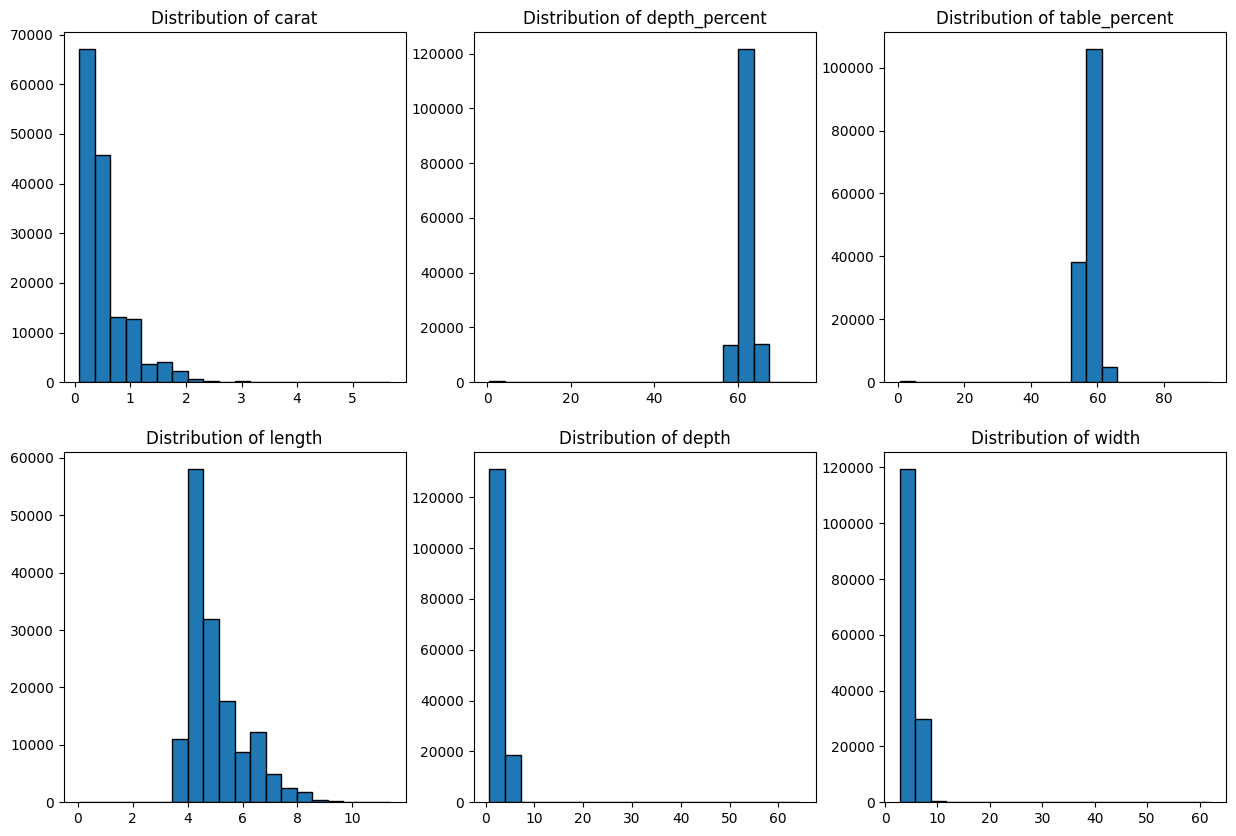

In [ ]:
numeric_cols = ['carat', 'depth_percent', 'table_percent', 'length', 'depth', 'width']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for ax, col in zip(axs.flatten(), numeric_cols):
  ax.hist(diamonds_encoded[col], bins = 20, edgecolor='black')
  ax.set_title('Distribution of ' + col)

**<font color=blue size=4>Question 1.2**

**Plot the histogram of numerical features. What preprocessing can be done if the
distribution of a feature has high skewness?**

We already plot the histogram of numerical features. We can see that there are high skewness about these histograms. If the distribution of a feature has high skewness, we can do log transformation preprocess. It is very effective for right-skewed data (positive skewness). It's applied by taking the logarithm of each value in the feature. Also, we can do square root transformation. It is similar to log transformation but less aggressive. It's useful for dealing with moderate skewness and can be applied by taking the square root of each value in the feature. These two preprocessing method are very effective to deal with high skewness.

#### Question 1.3

Text(0.5, 0.98, '')

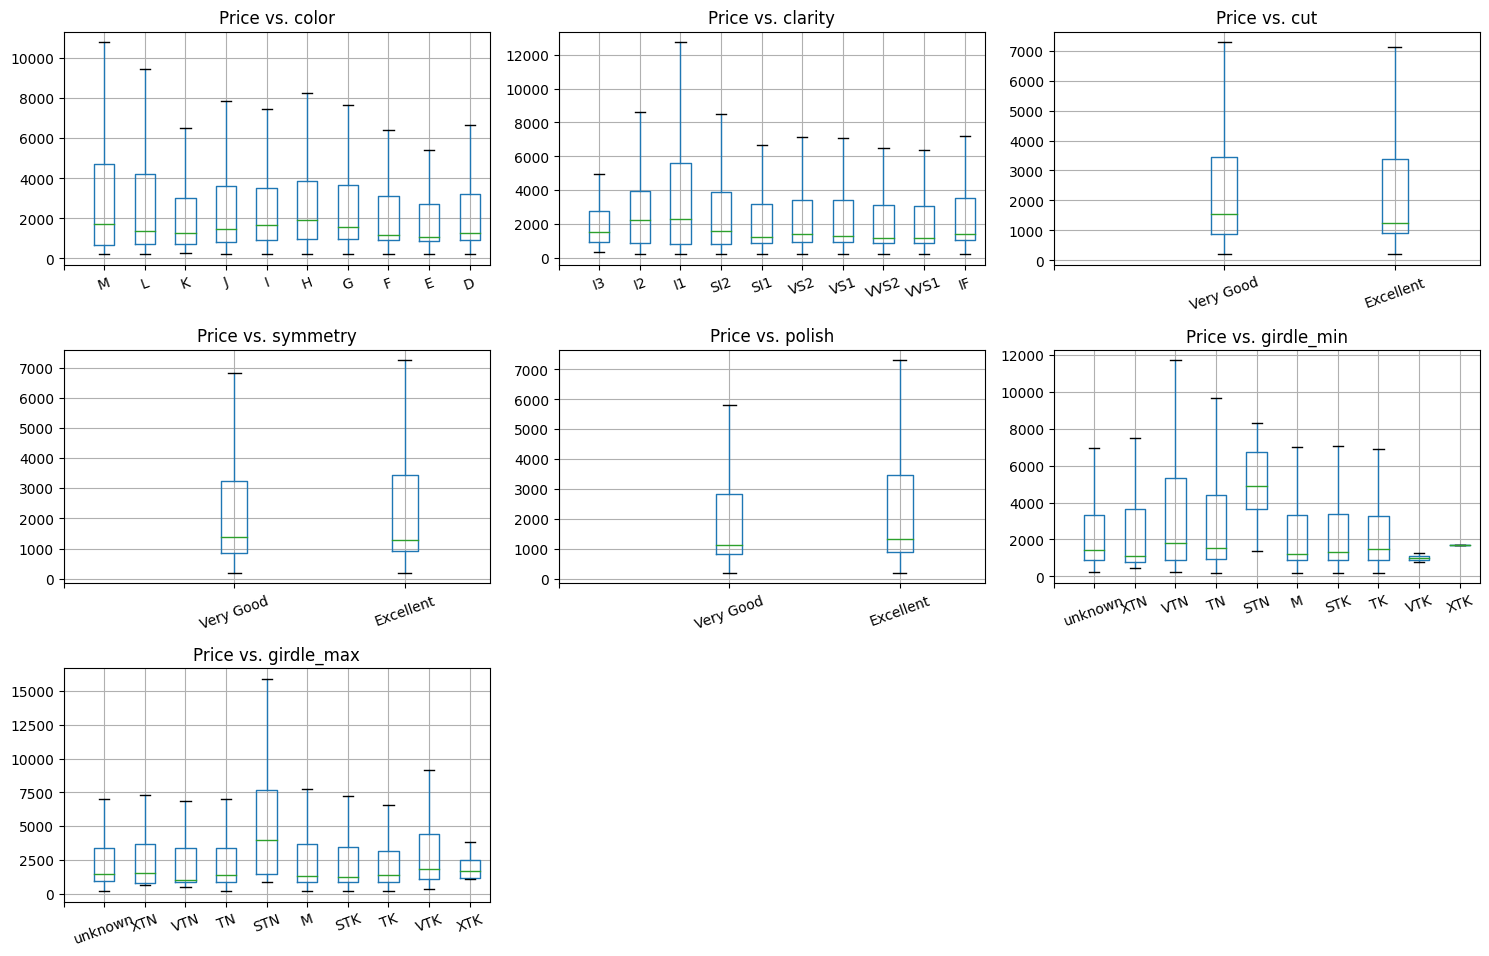

In [ ]:
cat_cols = ['color', 'clarity', 'cut', 'symmetry', 'polish', 'girdle_min', 'girdle_max']
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for ax, col in zip(axs.flatten(), cat_cols):
  diamonds_encoded.boxplot(column = 'price', by = col, ax = ax, sym = '')
  ax.set_title('Price vs. ' + col)
  ax.set_xlabel('')
  if col == 'color':
    ax.set_xticks(np.arange(0, 11), [''] + list(color_order.keys()), rotation = 20)
  elif col == 'clarity':
    ax.set_xticks(np.arange(0, 11), [''] + list(clarity_order.keys()), rotation = 20)
  elif col == 'girdle_min' or col == 'girdle_max':
    ax.set_xticks(np.arange(0, 11), [''] + list(girdle_order.keys()), rotation = 20)
  else:
    ax.set_xticks(np.arange(0, 3), [''] + list(cut_order.keys()), rotation = 20)
fig.delaxes(axs[2][1])
fig.delaxes(axs[2][2])
fig.tight_layout()
fig.suptitle('')

**<font color=blue size=4>Question 1.3**

**Construct and inspect the box plot of categorical features vs target variable. What
do you find?**

We construct and inspect the box plot of categorical features vs target variable. There are seven categorical features. The cut, symmetry, and polish levels don't have a huge impact on the price. Because they only have two similar levels: very good and excellent. For color, the color "H" have the highest medium price. For clarity, clarity "I1" have the highest medium price and largest price range. For girdle_min and girdle_max, girdle "STN" have the highest medium price.

#### Question 1.4

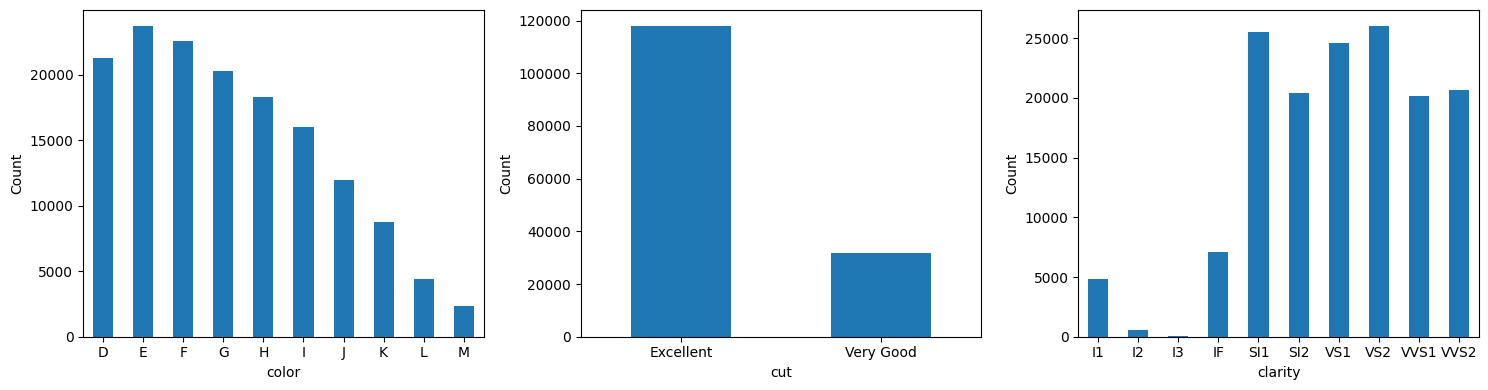

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axs.flatten(), ['color', 'cut', 'clarity']):
  diamonds.groupby(col).count()['price'].reset_index().plot.bar(x = col, y = 'price', ax = ax, rot = 0)
  ax.set_ylabel('Count')
  ax.get_legend().remove()
fig.tight_layout()

**<font color=blue size=4>Question 1.4**

**For the Diamonds dataset, plot the counts by color, cut and clarity.**

We plot the counts by color, cut and clarity. For color, olor "E" has the highest number. For cut, the number of "excellent" is more than the number of "very good". For clarity, "VS2" has the highest number.

### Standardization


#### Question 2.1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
diamonds_std = diamonds_encoded.copy()
numeric_cols = diamonds_encoded.drop(columns='price', index = 1).columns
for col in numeric_cols:
  diamonds_std[col] = scaler.fit_transform(diamonds_std[[col]])

In [ ]:
diamonds_std.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,0.916097,0.811981,-1.157106,0.518390,-1.746964,-2.522184,0.215866,0.345119,-2.146391,-2.078247,-0.730430,0.740762,0.398437,200
1,0.916097,0.811981,-1.157106,-1.929051,-1.746964,-2.522184,0.014689,0.345119,-2.156289,-2.059209,-0.735681,1.148066,0.743576,200
2,0.916097,0.811981,-1.157106,0.518390,-1.746964,-2.522184,-0.186488,0.345119,-2.116697,-2.049690,-0.740932,-0.073845,0.398437,200
3,0.916097,0.811981,-1.157106,0.518390,-1.746964,-2.522184,0.039836,0.345119,-2.136493,-2.068728,-0.735681,0.740762,0.743576,200
4,0.916097,0.811981,-1.157106,-1.929051,-1.746964,0.396482,0.769101,0.218693,-2.205778,-2.116324,-0.714676,1.148066,0.743576,200


**<font color=blue size=4>Question 2.1**

**Standardize feature columns and prepare them for training.**

We standardize feature columns using sklearn.preprocessing.StandardScaler. Please see the results above.

### Feature Selection


#### Question 2.2

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

In [ ]:
X = diamonds_std.drop('price', axis = 1)
y = diamonds_std['price']

In [ ]:
mi = mutual_info_regression(X, y)

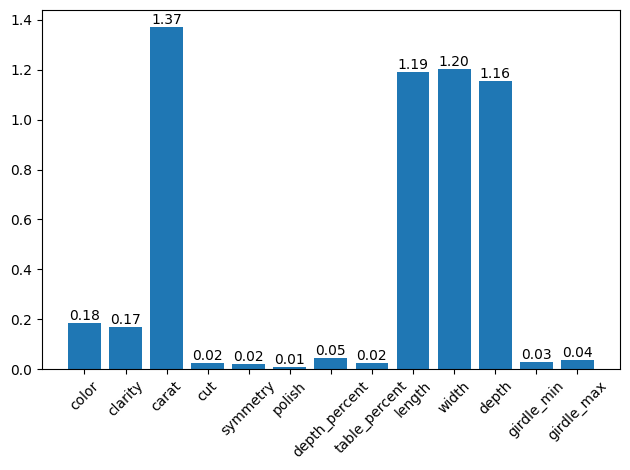

In [ ]:
plt.bar(X.columns, mi)
plt.xticks(rotation = 45)
plt.tight_layout()

for index, value in enumerate(mi):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [ ]:
mi_info = [(a, b) for a, b in zip(X.columns, mi)]
mi_info.sort(key = lambda x: x[1])
mi_info[:2]

[('polish', 0.00985235629705894), ('symmetry', 0.02131638258884294)]

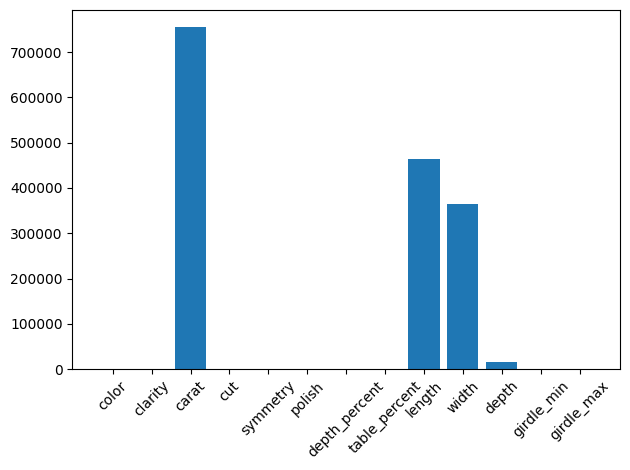

In [ ]:
f_statistic = f_regression(X, y)[0]
plt.bar(X.columns, f_statistic)
plt.xticks(rotation = 45)
plt.tight_layout()

**<font color=blue size=4>Question 2.2**

**You may use these functions to select features that yield better regression results (especially in the classical models). Describe how this step qualitatively affects the
performance of your models in terms of test RMSE. Is it true for all model types? Also
list two features for either dataset that has the lowest MI w.r.t to the target.**

We use these functions to select features that yield better regression results. For both functions, the features carat, length, width, and depth are more important than others, so we choose these features. This step will help to increase the performance of our models. Because other features are not realted to the price, and if we choose those features, it will cause the accuracy of RMSE decrease. It may become noise. And only choose features that most related to price will increase the accuracy of test RMSE.

However, this is not necessarily true for all model types. Some models, particularly those that are capable of feature selection internally(Neural Network, and Random Forest), may not show as much improvement with pre-selection of features because they are inherently equipped to handle a high dimensional feature space and can ignore irrelevant features on their own.

According to the graph above, the 'girdle_min'= 0.009011980762455352 and 'polish' = 0.011717152096081929 have the lowest MI w.r.t to the target.

## Training

In [ ]:
selected_features = ['carat', 'length', 'width', 'depth']
X = X[selected_features]

 ## Evaluation

### Linear Regression


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
ols = linear_model.LinearRegression()
lasso = linear_model.Lasso(alpha = 1)
ridge = linear_model.Ridge(alpha = 1)

In [ ]:
kf = KFold(n_splits=10, shuffle = True, random_state = 42)
train_rmse_ols = []
test_rmse_ols = []
coefs_ols = []
train_rmse_lasso = []
test_rmse_lasso = []
coefs_lasso = []
train_rmse_ridge = []
test_rmse_ridge = []
coefs_ridge = []
for train_index, test_index in kf.split(X, y):
  ols.fit(X.iloc[train_index], y.iloc[train_index])
  y_preds_ols_test = ols.predict(X.iloc[test_index])
  y_preds_ols_train = ols.predict(X.iloc[train_index])
  train_rmse_ols.append(mean_squared_error(y_pred=y_preds_ols_train, y_true=y.iloc[train_index], squared = False))
  test_rmse_ols.append(mean_squared_error(y_pred=y_preds_ols_test, y_true=y.iloc[test_index], squared = False))
  coefs_ols.append(ols.coef_)

  lasso.fit(X.iloc[train_index], y.iloc[train_index])
  y_preds_lasso_test = lasso.predict(X.iloc[test_index])
  y_preds_lasso_train = lasso.predict(X.iloc[train_index])
  train_rmse_lasso.append(mean_squared_error(y_pred=y_preds_lasso_train, y_true=y.iloc[train_index], squared = False))
  test_rmse_lasso.append(mean_squared_error(y_pred=y_preds_lasso_test, y_true=y.iloc[test_index], squared = False))
  coefs_lasso.append(lasso.coef_)

  ridge.fit(X.iloc[train_index], y.iloc[train_index])
  y_preds_ridge_test = ridge.predict(X.iloc[test_index])
  y_preds_ridge_train = ridge.predict(X.iloc[train_index])
  train_rmse_ridge.append(mean_squared_error(y_pred=y_preds_ridge_train, y_true=y.iloc[train_index], squared = False))
  test_rmse_ridge.append(mean_squared_error(y_pred=y_preds_ridge_test, y_true=y.iloc[test_index], squared = False))
  coefs_ridge.append(ridge.coef_)

In [ ]:
print('OLS averge training set RMSE: ', np.mean(train_rmse_ols))
print('OLS averge test set RMSE: ', np.mean(test_rmse_ols))
print('OLS averge learned parameter: ', np.mean(coefs_ols, axis = 0))
print('--------------------------------------')
print('Lasso averge training set RMSE: ', np.mean(train_rmse_lasso))
print('Lasso averge test set RMSE: ', np.mean(test_rmse_lasso))
print('Lasso averge learned parameter: ', np.mean(coefs_lasso, axis = 0))
print('--------------------------------------')
print('Ridge averge training set RMSE: ', np.mean(train_rmse_ridge))
print('Ridge averge test set RMSE: ', np.mean(test_rmse_ridge))
print('Ridge averge learned parameter: ', np.mean(coefs_ridge, axis = 0))

OLS averge training set RMSE:  1880.6771316153204
OLS averge test set RMSE:  1880.7452527013866
OLS averge learned parameter:  [ 5815.93813039 -1502.34136617   -51.00216217   -17.22560096]
--------------------------------------
Lasso averge training set RMSE:  1880.696668370325
Lasso averge test set RMSE:  1880.7593723064354
Lasso averge learned parameter:  [ 5779.87282974 -1467.91138428   -49.5723373    -16.57259549]
--------------------------------------
Ridge averge training set RMSE:  1880.6771459854408
Ridge averge test set RMSE:  1880.7454232767327
Ridge averge learned parameter:  [ 5814.96704869 -1501.24134815   -51.14972242   -17.23227303]


#### Question 4.1

**<font color=blue size=4>Question 4.1**

**Explain how each regularization scheme affects the learned parameter set.**

The objective functions are:

*   ordinary least squares:  $\text{Minimize} \quad J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

*   Lasso: $\text{Minimize} \quad J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|$

*   Ridge regression: $\text{Minimize} \quad J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2$

For Lasso regularization scheme affects the learned parameter set:

*   In order to do feature selection, Lasso tends to decrease less significant feature coefficients to exactly zero. This might be especially helpful if you want a sparse model and you think some features might not be relevant, in which case readability and simplicity are crucial. On the other hand, by unduly punishing the coefficients, an excessively large λ can cause underfitting.


For Ridge regression regularization scheme affects the learned parameter set:

*   In contrast to Lasso, Ridge penalizes coefficient sizes but does not drive them to zero, hence it does not provide sparse results. Rather, it retains less significant characteristics in the model but lessens their impact. When you have more features than observations or are dealing with multicollinearity—a situation in which independent variables exhibit high correlation—this is advantageous.




#### Question 4.2

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
alpha_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso = GridSearchCV(linear_model.Lasso(alpha = 1), alpha_params, scoring='neg_root_mean_squared_error', cv = KFold(n_splits=10, shuffle = True, random_state = 42), return_train_score=True)
lasso.fit(X, y)
ridge = GridSearchCV(linear_model.Ridge(alpha = 1), alpha_params, scoring='neg_root_mean_squared_error', cv = KFold(n_splits=10, shuffle = True, random_state = 42), return_train_score=True)
ridge.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(alpha=1),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
lasso_results = pd.DataFrame(lasso.cv_results_)[['params', 'mean_test_score', 'mean_train_score']]
lasso_results['model'] = ['Lasso'] * 8
ridge_results = pd.DataFrame(ridge.cv_results_)[['params', 'mean_test_score', 'mean_train_score']]
ridge_results['model'] = ['Ridge'] * 8
lasso_results.append(ridge_results).sort_values('mean_test_score', ascending = False)

<ipython-input-54-f114a6ec2118>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lasso_results.append(ridge_results).sort_values('mean_test_score', ascending = False)


,params,mean_test_score,mean_train_score,model
3,{'alpha': 0.1},-1880.744270,-1880.677322,Lasso
2,{'alpha': 0.01},-1880.744816,-1880.677134,Lasso
1,{'alpha': 0.001},-1880.745199,-1880.677132,Lasso
0,{'alpha': 0.0001},-1880.745247,-1880.677132,Lasso
0,{'alpha': 0.0001},-1880.745253,-1880.677132,Ridge
1,{'alpha': 0.001},-1880.745253,-1880.677132,Ridge
2,{'alpha': 0.01},-1880.745254,-1880.677132,Ridge
3,{'alpha': 0.1},-1880.745268,-1880.677132,Ridge
4,{'alpha': 1},-1880.745423,-1880.677146,Ridge
5,{'alpha': 10},-1880.748241,-1880.678561,Ridge


**<font color=blue size=4>Question 4.2**

**Report your choice of the best regularization scheme along with the optimal penalty
parameter and explain how you computed it.**

| Feature Selection | Regression | Train RMSE | Test RMSE | optimal penalty parameter
| ------   | ----- | ----- | ----- | ----- |
|   MI   |  ordinary least squares | 1880.6771316153204  | 1880.7452527013866 | ------ |
| MI | Lasso  | 1880.677322 |  1880.744270 | 0.1 |
| MI | Ridge  | 1880.677132	 | 1880.745253	  | 0.0001 |

We analyze the Train RMSE and Test RMSE of ordinary least squares, Lasso and Ridge on top four features selected from diamond dataset. In order to compute the best regularization scheme along with the optimal penalty parameter, we construct pipline by using girdsearch with 10-fold cross validation with the range of alpha: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]. You can find the results from the above cell, and we summarize the best result with optimal parameter for each model in the table above. You can see that the results are almost similar, but Lasso regularization scheme along with alpha = 0.1 is tge best regulaeization.

#### Question 4.3

In [ ]:
X_no_std = diamonds_encoded[['carat', 'length', 'width', 'depth']]

In [ ]:
alpha_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
std_ridge = GridSearchCV(linear_model.Ridge(alpha = 1), alpha_params, scoring='neg_root_mean_squared_error', cv = KFold(n_splits=10, shuffle = True, random_state = 42), return_train_score=True)
std_ridge.fit(X, y)
std_ridge_results = pd.DataFrame(std_ridge.cv_results_)[['params', 'mean_test_score', 'mean_train_score']]
std_ridge_results['Standardization'] = [True] * 8

no_std_ridge = GridSearchCV(linear_model.Ridge(alpha = 1), alpha_params, scoring='neg_root_mean_squared_error', cv = KFold(n_splits=10, shuffle = True, random_state = 42), return_train_score=True)
no_std_ridge.fit(X_no_std, y)
no_std_ridge_results = pd.DataFrame(no_std_ridge.cv_results_)[['params', 'mean_test_score', 'mean_train_score']]
no_std_ridge_results['Standardization'] = [False] * 8

std_ridge_results.append(no_std_ridge_results).sort_values('mean_test_score', ascending = False)


<ipython-input-61-e4b5234d4124>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  std_ridge_results.append(no_std_ridge_results).sort_values('mean_test_score', ascending = False)


,params,mean_test_score,mean_train_score,Standardization
3,{'alpha': 0.1},-1880.745218,-1880.677135,False
4,{'alpha': 1},-1880.745240,-1880.677504,False
2,{'alpha': 0.01},-1880.745249,-1880.677132,False
1,{'alpha': 0.001},-1880.745252,-1880.677132,False
0,{'alpha': 0.0001},-1880.745253,-1880.677132,False
0,{'alpha': 0.0001},-1880.745253,-1880.677132,True
1,{'alpha': 0.001},-1880.745253,-1880.677132,True
2,{'alpha': 0.01},-1880.745254,-1880.677132,True
3,{'alpha': 0.1},-1880.745268,-1880.677132,True
4,{'alpha': 1},-1880.745423,-1880.677146,True


**<font color=blue size=4>Question 4.3**

**Does feature standardization play a role in improving the model performance (in
the cases with ridge regularization)? Justify your answer.**

|          standardization         | Feature Selection | Regression | Train RMSE | Test RMSE | optimal penalty parameter
| ----------------  | ------   | ----- | ----- | ----- | ----- |
| No           | MI | Ridge  | 1880.677135	 | 1880.745218	  | 0.1 |
| Yes           | MI | Ridge  | 1880.677132	 |  1880.745253 | 0.0001 |

We summarize the best results with optimal penalty parameter for ridge model in two different cases in the table. You can see that the feature standardization does not play a role in improving the model performance. The reason may be the gradient descent steps will be more uniform across features when features are standardized, the optimization process may converge more steadily and quickly. While this has no direct bearing on enhancing the model's overall performance, it can increase the effectiveness and dependability of the training procedure.

#### Question 4.4

**<font color=blue size=4>Question 4.4**

**• Some linear regression packages return p-values for different features
. What is the
meaning of these p-values and how can you infer the most significant features? A
qualitative reasoning is sufficient.**

p-values indicates how statistically significant each feature's relationship with the dependent variable is. The lower the p-value, the less likely that the observed correlation between the feature and the dependent variable is due to chance, implying a statistically significant relationship. Therefore, the most significant features have the lowest p-values (usually lower than 0.05).

### Polynomial Regression

#### Question 5.1

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(3)
X_3 = poly.fit_transform(X)#need standardize
scaler = StandardScaler()
X_3 = scaler.fit_transform(X_3)
X_3 = pd.DataFrame(X_3, columns = poly.get_feature_names_out()).drop('1', axis = 1)

X_3.head()

,carat,length,width,depth,carat^2,carat length,carat width,carat depth,length^2,length width,...,length^3,length^2 width,length^2 depth,length width^2,length width depth,length depth^2,width^3,width^2 depth,width depth^2,depth^3
0,-1.157106,-2.146391,-2.078247,-0.730430,0.112412,0.661287,0.659789,0.413400,1.972797,1.959006,...,-1.839805,-1.846069,-1.393435,-0.768570,-1.395211,-0.059965,-0.021376,-0.762946,-0.060031,-0.030938
1,-1.157106,-2.156289,-2.059209,-0.735681,0.112412,0.666297,0.649857,0.418366,1.996090,1.947520,...,-1.862437,-1.846067,-1.413839,-0.759258,-1.398388,-0.060639,-0.020977,-0.755379,-0.060213,-0.030947
2,-1.157106,-2.116697,-2.049690,-0.740932,0.112412,0.646257,0.644891,0.423333,1.903562,1.890503,...,-1.773151,-1.779346,-1.376748,-0.740894,-1.378615,-0.060484,-0.020780,-0.753939,-0.060556,-0.030957
3,-1.157106,-2.136493,-2.068728,-0.735681,0.112412,0.656277,0.654823,0.418366,1.949612,1.936066,...,-1.817380,-1.823622,-1.390865,-0.759259,-1.392676,-0.060309,-0.021176,-0.761582,-0.060377,-0.030947
4,-1.157106,-2.205778,-2.116324,-0.714676,0.112412,0.691348,0.679653,0.398500,2.114161,2.075315,...,-1.978747,-1.969338,-1.434645,-0.813171,-1.424845,-0.059393,-0.022197,-0.772838,-0.059142,-0.030910


In [ ]:
alpha_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
ridge = GridSearchCV(linear_model.Ridge(alpha = 1), alpha_params, scoring='neg_root_mean_squared_error', cv = KFold(n_splits=10, shuffle = True, random_state = 42), return_train_score=True)
ridge.fit(X_3, y)
ridge.best_params_

{'alpha': 10}

In [ ]:
ridge = linear_model.Ridge(alpha = 10)
kf = KFold(n_splits=10, shuffle = True, random_state = 42)
train_rmse_ridge = []
test_rmse_ridge = []
coefs_ridge = []
for train_index, test_index in kf.split(X_3, y):
  ridge.fit(X_3.iloc[train_index], y.iloc[train_index])
  y_preds_ridge_test = ridge.predict(X_3.iloc[test_index])
  y_preds_ridge_train = ridge.predict(X_3.iloc[train_index])
  train_rmse_ridge.append(mean_squared_error(y_pred=y_preds_ridge_train, y_true=y.iloc[train_index], squared = False))
  test_rmse_ridge.append(mean_squared_error(y_pred=y_preds_ridge_test, y_true=y.iloc[test_index], squared = False))
  coefs_ridge.append(ridge.coef_)

In [ ]:
avg_coefs_ridge = np.mean(coefs_ridge, axis = 0)
coef_info = [(a, b) for a, b in zip(X_3.columns, avg_coefs_ridge)]
coef_info.sort(key = lambda x: abs(x[1]), reverse = True)
coef_info

[('carat^2 length', -3441.4865593764357),
 ('carat^3', 3156.5397788929267),
 ('carat^2 width', -2774.689972740433),
 ('length^2 width', 2091.1192335161536),
 ('depth^2', -1579.7828691497198),
 ('carat^2', 1145.6859838051978),
 ('width', 966.2088640141561),
 ('carat', 901.4456512667523),
 ('depth', 852.1881439493333),
 ('carat length^2', -849.6105127485292),
 ('depth^3', 807.97738736318),
 ('width^2', -778.3067145044142),
 ('carat width', 733.3360378817061),
 ('length^3', 645.2771741126419),
 ('length^2', 632.3224072787316),
 ('carat length', 483.1179841628529),
 ('carat depth^2', 473.84731026322714),
 ('carat width depth', 461.9852815154406),
 ('carat depth', -461.73297832447344),
 ('width^3', 458.363733703031),
 ('length width^2', 455.1075856481199),
 ('length', 451.6053082693344),
 ('carat^2 depth', -415.3925639628549),
 ('carat width^2', -383.0844203774538),
 ('length width', 306.080320914116),
 ('length depth^2', -304.2077156519693),
 ('width^2 depth', -293.43190672970337),
 ('widt

**<font color=blue size=4>Question 5.1**

**What are the most salient features? Why?**

The most salient features are features with higher absolute coefficient values. The higher coefficient values mean in the ridge regression, features with higher absolute coefficient values after regularization are generally more influential in predicting the outcome. These coefficients represent the relationship between the feature and the dependent variable, with larger values indicating a stronger relationship. We got the top 5 most salient fetures, which are:

1.   'carat^2 length' = 3441.4865593764357

2.   'carat^3' = 3156.5397788929267

3.   'carat^2 width' = 2774.689972740433


4.   'length^2 width' = 2091.1192335161536

5.   'depth^2' = 1579.7828691497198

We can find that 'carat^2 length' has the largest coefficient values, and then the 'carat^3' and 'carat^2 width'. Because in the previous section, we already used mutual_info_regression to find that carat has the highest coefficient values. In this case, the square and cube of carat will also have the highest coefficient values.

#### Question 5.2

In [ ]:
poly_degree = np.arange(1, 7)
train_rmse = []
test_rmse = []
for i in poly_degree:
  poly = PolynomialFeatures(i)
  X_poly = poly.fit_transform(X)
  kf = KFold(n_splits=10, shuffle = True, random_state = 42)
  train_rmse_ridge = []
  test_rmse_ridge = []
  ridge = linear_model.Ridge(alpha = 10)
  for train_index, test_index in kf.split(X_poly, y):
    ridge.fit(X_poly[train_index], y.iloc[train_index])
    y_preds_ridge_test = ridge.predict(X_poly[test_index])
    y_preds_ridge_train = ridge.predict(X_poly[train_index])
    train_rmse_ridge.append(mean_squared_error(y_pred=y_preds_ridge_train, y_true=y.iloc[train_index], squared = False))
    test_rmse_ridge.append(mean_squared_error(y_pred=y_preds_ridge_test, y_true=y.iloc[test_index], squared = False))
  train_rmse.append(np.mean(train_rmse_ridge))
  test_rmse.append(np.mean(test_rmse_ridge))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.18018e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11953e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.10424e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.10557e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

(0.0, 90000.0)

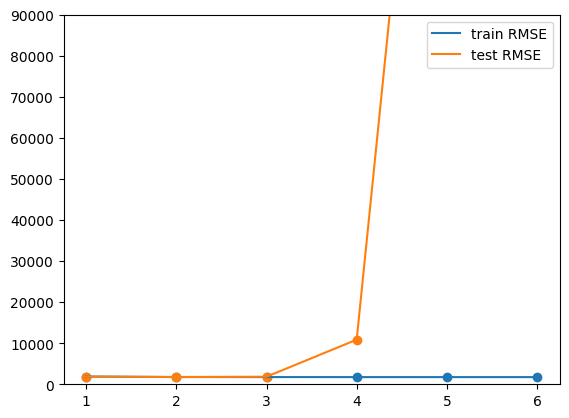

In [ ]:
plt.scatter(poly_degree, train_rmse)
plt.plot(poly_degree, train_rmse, label = 'train RMSE')
plt.scatter(poly_degree, test_rmse)
plt.plot(poly_degree, test_rmse, label = 'test RMSE')
plt.legend()
ax = plt.gca()
ax.set_ylim([0, 90000])

**<font color=blue size=4>Question 5.2**

**What degree of polynomial is best? How did you find the optimal degree? What
does a very high-order polynomial imply about the fit on the training data? What
about its performance on testing data?**

Polynomial degree of 3 is the best as we can tell from the above plot. The training RMSE and the testing RMSE are both at its lowest at polynomial degree of 3. As the polynomial degree reaches 4 and above, the testing RMSE starts to increase at a exponential rate, indicating an overfitting of the training data and leading to an under-performance on the testing data.

### Neural Network

#### Question 6.1

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp =
param_grid =

In [ ]:
grid_search = GridSearchCV(mlp, param_grid, cv=KFold(n_splits=5, shuffle = True, random_state = 42), scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPRegressor(max_iter=1000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(32,), (64,), (32, 32),
                                                (64, 32)]},
             scoring='neg_mean_squared_error')

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results['RMSE'] = np.sqrt(cv_results['mean_test_score'].abs())
cv_results.sort_values('RMSE', ascending = True)[['param_alpha', 'param_hidden_layer_sizes', 'RMSE']]

,param_alpha,param_hidden_layer_sizes,RMSE
10,0.01,"(32, 32)",1744.395235
11,0.01,"(64, 32)",1745.164427
7,0.001,"(64, 32)",1746.031466
2,0.0001,"(32, 32)",1746.155248
3,0.0001,"(64, 32)",1746.222473
6,0.001,"(32, 32)",1747.313799
1,0.0001,"(64,)",1750.684198
5,0.001,"(64,)",1750.976397
9,0.01,"(64,)",1751.666856
4,0.001,"(32,)",1754.860837


In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score (RMSE):", cv_results['RMSE'].min())

Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (32, 32)}
Best score (RMSE): 1744.3952348578516


**<font color=blue size=4>Question 6.1**

**Adjust your network size (number of hidden neurons and depth), and weight decay
as regularization. Find a good hyper-parameter set systematically (no more than
20 experiments in total).**

For the neural network, we used 5-fold cross-validation. We tried to use 10-fold cross validation, but it would take more than ten hours to train. So we decided to use 5-fold cross-validation instead. We used gird search in the problem to find a good hyper-parameter set systematically. There are 12 experiments in total. And for hidden_layer_sizes, we used (32,), (64,), (32, 32), (64, 32). For alpha, we used: 0.0001, 0.001, 0.01. You can see the results above. The best parameters are alpha = 0.01 and hidden_layers_sizes is (32, 32). The RMSE is 1744.3952348578516, which is the samllest.

#### Question 6.2

**<font color=blue size=4>Question 6.2**

**How does the performance generally compare with linear regression? Why?**

| Feature Selection | Regression  | Test RMSE | optimal penalty parameter
| ------   | -----  | ----- | ----- |
|   MI   |  ordinary least squares  | 1880.7452527013866 | ------ |
| MI | Lasso  |  1880.744270 | 0.1 |
| MI | Ridge  | 1880.745253	  | 0.0001 |
| MI | MLP  | 1744.395235  | 0.01, (32, 32)|

The performance of neural network is better than the linear regression. The table shows that the performance of linear regression. We can see that the Test RMSE scores for the linear regression are all over 1880. But for neural network, the Test RMSE scores are all below 1800, which means that the nerual network generally have the better performance.

There are some reasons about this. First reason is feature interactions. Neural networks, with its hidden layers, are able to automatically learn and simulate features' interactions. To capture these links, however, linear regression models need the manual development of interaction terms, which is time-consuming and may overlook subtle interactions that are complex. Second reason is non-linearity. The capacity of neural networks to simulate non-linear interactions between inputs and outputs is one of its greatest advantages. Since linear regression can only handle linear connections by definition, it can be severely limited when working with real-world data, which frequently displays non-linearity. Neural networks employ activation functions such as sigmoid, tanh, or ReLU to bring non-linearity into the input, enabling them to identify intricate patterns. Third reason is flexibility in model architecture. A highly flexible way to represent complexity is possible with a neural network due to the fact that the number of layers and neurons in each layer can be changed. Because of its flexibility, the model may be fine-tuned to the unique characteristics of the dataset, which boosts its capacity to lower mistakes and enhance prediction accuracy.



#### Question 6.3

**<font color=blue size=4>Question 6.3**

**What activation function did you use for the output and why? You may use none.**

We use the default activation function for the output, Relu, and do not include any other activation functions in the girdsearch. ReLU ensures that the predictions made by the neural network are non-negative, matching the nature of the price data. Also, unlike other activation functions like sigmoid or tanh, ReLU does not have an upper bound, making it suitable for regression tasks where the target variable can have a wide range of values. This property allows the network to predict high values without being constrained by the activation function.

#### Question 6.4

**<font color=blue size=4>Question 6.4**

**What is the risk of increasing the depth of the network too far?**

There are some risks of increasing the depth of the network too far.

*   **Overfitting:** With additional parameters, a deeper network may identify more complex patterns in the training set. Although this may appear advantageous, it may cause the model to pick up noise and quirks from the training set that don't transfer to new data. Overfitting causes the model to perform poorly on fresh data, which leads to high training accuracy but low test accuracy.

*   **Vanishing/Exploding Gradients:** During backpropagation, the network is more vulnerable to vanishing and ballooning gradient issues as its depth grows. Gradients computed during the training phase in deep networks have the potential to either vanish or explode as they move back through the layers. This can cause the weights to wobble or diverge, or it can result in sluggish convergence, which would make training extremely difficult.

*   **Increased Computational Complexity:** More processing power is needed for training and inference in deeper networks. This entails requiring additional memory and processing power in addition to lengthier training periods. This can become a practical limitation for very deep networks, particularly when resources are few.

*   **Difficulty in Training:** It can be difficult to train very deep networks since appropriate optimization strategies and meticulous parameter setup are required. While they can help to some extent, methods like batch normalization, residual connections, and advanced optimizers make the model design and training procedure more difficult.





### Random Forest

#### Question 7.1

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(max_depth=2, random_state=0)
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [2, 3, 4],
  'max_features': [1, 2, 3]
}

In [ ]:
grid_search = GridSearchCV(rfr, param_grid, cv=KFold(n_splits=10, shuffle = True, random_state = 42), scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [1, 2, 3],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('mean_test_score', ascending = False)[['param_max_depth', 'param_max_features', 'param_n_estimators', 'mean_test_score']]

,param_max_depth,param_max_features,param_n_estimators,mean_test_score
23,4,2,200,-1745.894266
22,4,2,100,-1745.898649
21,4,2,50,-1746.206950
20,4,1,200,-1747.197303
19,4,1,100,-1747.520203
18,4,1,50,-1747.786822
25,4,3,100,-1747.916775
26,4,3,200,-1747.952504
24,4,3,50,-1748.308387
11,3,1,200,-1777.572883


In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score (RMSE):", -grid_search.best_score_)

Best parameters: {'max_depth': 4, 'max_features': 2, 'n_estimators': 200}
Best score (RMSE): 1745.894266409126


**<font color=blue size=4>Question 7.1**

**Random forests have the following hyper-parameters:**

* **Maximum number of features;**

* **Number of trees;**

* **Depth of each tree;**

**Explain how these hyper-parameters affect the overall performance. Describe if
and how each hyper-parameter results in a regularization effect during training.**

We used the maximum number of features, number of trees, and depth of eahc tree as hyper-parameters. For number of trees, we used 'n_estimators' are 50, 100, 200. For maximum number of features, we used 'max_depth' are 2, 3, 4. For depth of each tree, we used 'max_features' are 1, 2, 3.

For the number of trees, up to a certain point, model performance is usually improved by increasing the number of trees. More trees means lower variance.  However, performance improvements usually drop and computational cost and time increase beyond a certain number of trees.

For maximum number of features, the subset of features that are taken into account for splitting at each node is controlled by this option. By forcing trees to take into account varying subsets of features, a lower value promotes diversity among the forest's trees and can lessen overfitting by preventing any one feature from controlling the decision-making process. While individual trees may get more correct with a greater value, overfitting may result from the trees becoming too similar. It also makes sure that trees don't depend too much on any particular group of attributes, which encourages model diversity in the forest and improves generalization.

For depth of each tree, a tree's depth dictates the number of splits it must make before making a prediction. Though they create extremely detailed rules that are limited to the training data, deeper trees run the danger of overfitting when modeling more complicated patterns. Shallower trees, on the other hand, may underfit and miss significant patterns in the data. It ensures that they cannot develop too complicated decision rules by capping the complexity of each tree. By doing so, overfitting is less likely to occur, improving the model's ability to generalize to new data.


#### Question 7.2

**<font color=blue size=4>Question 7.2**

**How do random forests create a highly non-linear decision boundary despite the fact
that all we do at each layer is apply a threshold on a feature?**

Each tree in a random forest makes a series of simple decisions based on the values of individual features. Thee questions are very easy and simple. But a single decision tree can capture complex patterns by asking many simple questions, one after the other. This allows even a single tree to create a non-linear decision boundary. And in the random forests, there are many trees, and each trained on different parts of the data and looking at different features. Finally, the forest combines the answers from all its trees to make a final decision. Because each tree has made its own complex, non-linear decisions, the combined result can capture very complex patterns in the data, far beyond what any single simple decision could. Therefore, the random forests can create a highly non-linear decision boundary.

#### Question 7.3

In [ ]:
from sklearn.model_selection import train_test_split
import random
import sklearn
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfr = RandomForestRegressor(max_depth=4, max_features=2, n_estimators= 200, random_state=0, oob_score=True).fit(X_train, y_train)

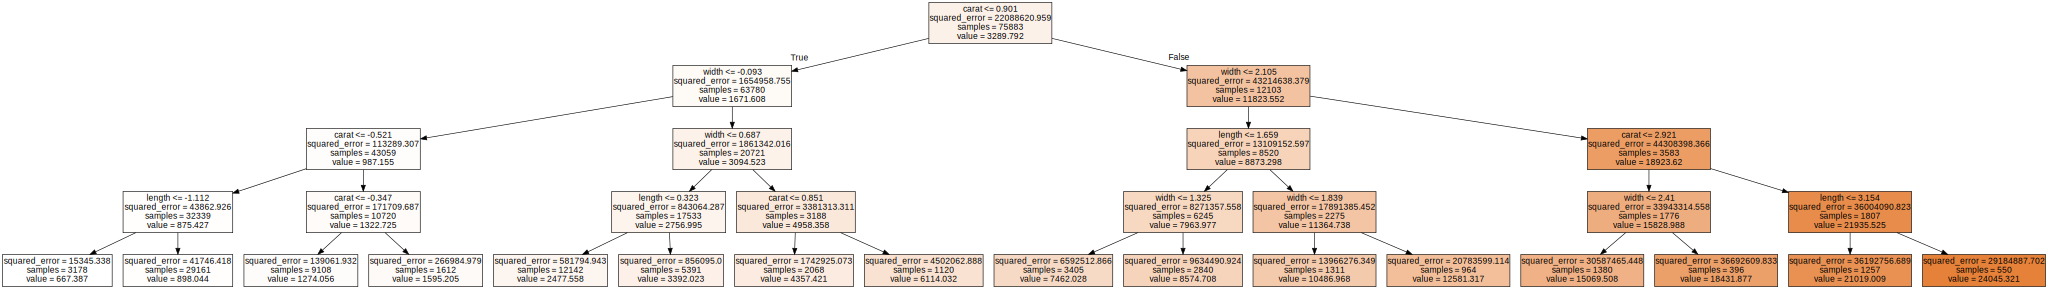

In [ ]:
import graphviz
dot_data = tree.export_graphviz(rfr.estimators_[0], out_file=None, feature_names=X.columns, filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

**<font color=blue size=4>Question 7.3**

**Randomly pick a tree in your random forest model (with maximum depth of 4) and
plot its structure. Which feature is selected for branching at the root node? What
can you infer about the importance of this feature as opposed to others? Do the
important features correspond to what you got in part 3.3.1?**

We randomly picked a tree in our random forest model (with maximum depth of 4) and plot its structure. You can see the results above. You can find that carat feature is selected for branching at the root node. It indicates its high importance in predicting the target variable, compared to other features. In Random Forests, the feature chosen for the split at the root node is typically one that best separates the data into groups with distinct outcomes. We can see that the important features are carat, width, and length. The important features correspond to what we got in part 3.3.1.

#### Question 7.4

In [ ]:
oob_error = 1 - rfr.oob_score_
print(f'Out-of-Bag Error: {oob_error}')

Out-of-Bag Error: 0.13712375681137312


**<font color=blue size=4>Question 7.4**

**Measure “Out-of-Bag Error” (OOB). Explain what OOB error and R2 score means.**

We measure the “Out-of-Bag Error” (OOB), which is 0.13712375681137312.

A technique for calculating the prediction error of ensemble learning techniques that use bagging, such as random forests, is called OOB (Out-of-Bag) error. It functions as an internal error estimate of the training performance of a random forest model, obviating the requirement for cross-validation or a separate validation set.

The coefficient of determination, or R2 score, is a statistic used to assess how well a regression model performs. It shows the percentage of the dependent variable's volatility that can be predicted based on the independent factors. The range of R2 scores is 0 to 1, where:

* A value of 0 signifies that the response data's variability around its mean is not explained by the model.
* A value of 1 denotes that all of the response data variability around its mean is explained by the model.


### LightGBM, CatBoost and Bayesian Optimization

#### Question 8.1

**<font color=blue size=4>Question 8.1**

**Read the documentation of LightGBM OR CatBoost and determine the important
hyperparameters along with a search space for the tuning of these parameters (keep
the search space small).**

After read the documentation of LightGBM, we determine the following hyperpararmeters along with a search space for the tuning of these parameters:

* num_leaves: Integer(20, 60). This parameter controls the maximum number of leaves in one tree. More leaves allow the model to learn finer details but can lead to overfitting. The range will allows for moderate to relatively high complexity in the model while managing overfitting risks.

* max_depth: Integer(3, 7). It limits the maximum depth of the tree. A deeper tree can model more complex patterns but increases the risk of overfitting. The range ensures that the trees are neither too shallow (potentially underfitting) nor too deep (leading to overfitting).

* learning_rate: Real(0.01, 0.2, 'uniform'). This is the step size at each iteration while moving toward a minimum of the loss function. A smaller learning rate requires more trees (n_estimators) to model all the relationships but generally leads to better generalization. The range offers a balance between learning speed and the risk of skipping over optimal solutions.

* n_estimators: Integer(100, 300). It specifies the number of boosting rounds or trees to build. More trees can improve model accuracy but also increase computation time. The range aims to provide sufficient modeling capacity without excessively prolonging training time or overcomplicating the model.

* min_child_samples: Integer(10, 30). This parameter sets the minimum number of data points needed in a leaf. Higher values prevent the model from learning relations which might be highly specific to the particular sample selected for a tree. This range help prevent overfitting by ensuring a minimum level of generalization in each leaf.


#### Question 8.2

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
pip install lightgbm

In [ ]:
from skopt import BayesSearchCV
import lightgbm as lgb
from skopt.space import Real, Categorical, Integer

In [ ]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lgbm = lgb.LGBMRegressor()

search_spaces = {
    'num_leaves': Integer(20, 60),
    'max_depth': Integer(3, 7),
    'learning_rate': Real(0.01, 0.2, 'uniform'),
    'n_estimators': Integer(100, 300),
    'min_child_samples': Integer(10, 30),
}

opt = BayesSearchCV(
    estimator=lgbm,
    search_spaces=search_spaces,
    n_iter=32,
    scoring='neg_root_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1,
    refit=True,
    random_state=42
)

opt.fit(X_train, y_train)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [ ]:
from sklearn.metrics import mean_squared_error
print(f"Best hyperparameters: {opt.best_params_}")

y_pred = opt.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Corresponding RMSE: {rmse}")

Best hyperparameters: OrderedDict([('learning_rate', 0.08763640625965091), ('max_depth', 5), ('min_child_samples', 30), ('n_estimators', 100), ('num_leaves', 60)])
Corresponding RMSE: 1737.2479215715648


**<font color=blue size=4>Question 8.2**

**Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to
find the ideal hyperparameter combination in your search space. Keep your search
space small enough to finish running on a single Google Colab instance within 60
minutes. Report the best hyperparameter set found and the corresponding RMSE.**

We applied Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to find the ideal hyperparameter combination in our search space. We found the best hyperparameters set are:

* learning_rate = 0.08763640625965091

* max_depth = 5

* min_child_samples = 30

* n_estimators = 100

* num_leaves 60

And the corresponding RMSE is 1737.2479215715648, which is even better.

#### Question 8.3

**<font color=blue size=4>Question 8.3**

**Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization (shrinks the generalization gap)? Which affects the fitting efficiency?**

Hyperparameter that helps with performance:
* Number of leaves:  allows the model to capture more complex patterns in the data.
* N_estimators: More trees can capture more patterns and interactions.
* Learning_rate: A smaller learning rate often yields better performance due to more precise convergence.

Hyperparameter that helps with regularization:
* Max_depth: Limits the depth of the trees.
* Min_child_samples: A larger number enforces more regularization, as it makes the algorithm more conservative, preventing it from creating leaves with few samples.

Hyperparameter that helps with fitting efficiency:
* Number of leaves: More leaves slow down the training process because the model has to make more splits to accommodate the additional leaves.
* N_estimators: More trees mean longer training times.
* Max_depth: Greater depth slow down the training process because the model has to make more splits to accommodate the additional depth.


# Part 2: Show Us Your Skills: Twitter Data

## Question 9.1

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
!unzip gdrive/MyDrive/ECE219_tweet_data.zip

Archive:  gdrive/MyDrive/ECE219_tweet_data.zip
  inflating: tweets_#gohawks.txt     
  inflating: tweets_#gopatriots.txt  
  inflating: tweets_#nfl.txt         
  inflating: tweets_#patriots.txt    
  inflating: tweets_#sb49.txt        
  inflating: tweets_#superbowl.txt   


In [ ]:
def calculate_statistics(file_path):
  tweet_count = 0
  total_followers = 0
  total_retweets = 0
  start_time = None
  end_time = None

  with open(file_path, 'r', encoding='utf-8') as file:
      for line in file:
          tweet = json.loads(line)
          tweet_count += 1


          total_followers += tweet['author']['followers']


          total_retweets += tweet['metrics']['citations']['total']


          tweet_time = datetime.fromtimestamp(tweet['citation_date'])


          if start_time is None or tweet_time < start_time:
              start_time = tweet_time
          if end_time is None or tweet_time > end_time:
              end_time = tweet_time


  duration_hours = (end_time - start_time).total_seconds() / 3600 if start_time and end_time else 0
  average_tweets_per_hour = tweet_count / duration_hours if duration_hours else 0
  average_followers_per_tweet = total_followers / tweet_count if tweet_count else 0
  average_retweets_per_tweet = total_retweets / tweet_count if tweet_count else 0

  return average_tweets_per_hour, average_followers_per_tweet, average_retweets_per_tweet

In [ ]:
hashtags = [
    'gohawks',
    'gopatriots',
    'nfl',
    'patriots',
    'sb49',
    'superbowl'
]

for hashtag in hashtags:
    file_path = f"tweets_#{hashtag}.txt"
    stats = calculate_statistics(file_path)
    print(f"Stats for #{hashtag}:")
    print(f"Average Tweets per Hour: {stats[0]:.2f}")
    print(f"Average Followers per Tweet: {stats[1]:.2f}")
    print(f"Average Retweets per Tweet: {stats[2]:.2f}")
    print("-" * 40)

Stats for #gohawks:
Average Tweets per Hour: 292.49
Average Followers per Tweet: 2217.92
Average Retweets per Tweet: 2.01
----------------------------------------
Stats for #gopatriots:
Average Tweets per Hour: 40.95
Average Followers per Tweet: 1427.25
Average Retweets per Tweet: 1.41
----------------------------------------
Stats for #nfl:
Average Tweets per Hour: 397.02
Average Followers per Tweet: 4662.38
Average Retweets per Tweet: 1.53
----------------------------------------
Stats for #patriots:
Average Tweets per Hour: 750.89
Average Followers per Tweet: 3280.46
Average Retweets per Tweet: 1.79
----------------------------------------
Stats for #sb49:
Average Tweets per Hour: 1276.86
Average Followers per Tweet: 10374.16
Average Retweets per Tweet: 2.53
----------------------------------------
Stats for #superbowl:
Average Tweets per Hour: 2072.12
Average Followers per Tweet: 8814.97
Average Retweets per Tweet: 2.39
----------------------------------------


**<font color=blue size=4>Question 9.1**

**Report the following statistics for each hashtag, i.e. each file has:**

**• Average number of tweets per hour**

**• Average number of followers of users posting the tweets per tweet (to make it simple,
we average over the number of tweets; if a users posted twice, we count the user
and the user’s followers twice as well)**

**• Average number of retweets per tweet**

For gohawks file:
* Average Tweets per Hour: 292.49
* Average Followers per Tweet: 2217.92
* Average Retweets per Tweet: 2.01

For gopatriots file:
* Average Tweets per Hour: 40.95
* Average Followers per Tweet: 1427.25
* Average Retweets per Tweet: 1.41

For nfl file:
* Average Tweets per Hour: 397.02
* Average Followers per Tweet: 4662.38
* Average Retweets per Tweet: 1.53

For patriots file:
* Average Tweets per Hour: 750.89
* Average Followers per Tweet: 3280.46
* Average Retweets per Tweet: 1.79

For sb49 file:
* Average Tweets per Hour: 1276.86
* Average Followers per Tweet: 10374.16
* Average Retweets per Tweet: 2.53

For superbowl file:
* Average Tweets per Hour: 2072.12
* Average Followers per Tweet: 8814.97
* Average Retweets per Tweet: 2.39

## Question 9.2

In [ ]:
from collections import Counter

In [ ]:
tweets_per_hour_counter = Counter()
with open('tweets_#superbowl.txt', 'r') as f:
  for line in f:
    tweet = json.loads(line)
    tweet_time = datetime.fromtimestamp(tweet['citation_date'])
    hour = tweet_time.replace(minute=0, second=0, microsecond=0)
    tweets_per_hour_counter[hour] += 1
hours = list(tweets_per_hour_counter.keys())
tweet_counts = list(tweets_per_hour_counter.values())

(array([16452., 16456., 16460., 16464., 16467., 16471.]),
 [Text(16452.0, 0, '2015-01-17'),
  Text(16456.0, 0, '2015-01-21'),
  Text(16460.0, 0, '2015-01-25'),
  Text(16464.0, 0, '2015-01-29'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16471.0, 0, '2015-02-05')])

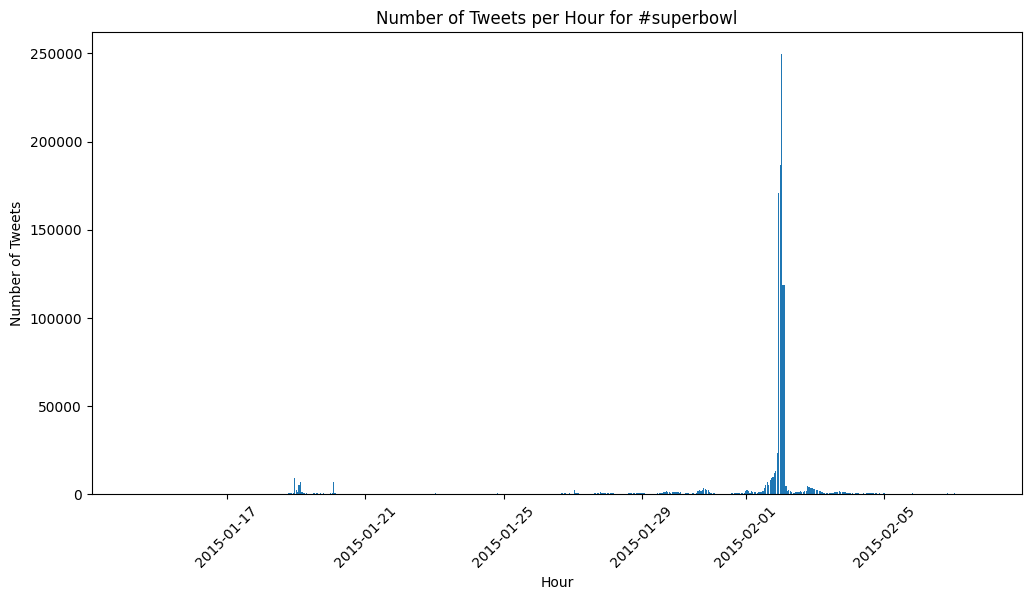

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(hours, tweet_counts, width=0.035)
plt.title('Number of Tweets per Hour for #superbowl')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)

In [ ]:
tweets_per_hour_counter = Counter()
with open('tweets_#nfl.txt', 'r') as f:
  for line in f:
    tweet = json.loads(line)
    tweet_time = datetime.fromtimestamp(tweet['citation_date'])
    hour = tweet_time.replace(minute=0, second=0, microsecond=0)
    tweets_per_hour_counter[hour] += 1
hours = list(tweets_per_hour_counter.keys())
tweet_counts = list(tweets_per_hour_counter.values())

(array([16452., 16456., 16460., 16464., 16467., 16471.]),
 [Text(16452.0, 0, '2015-01-17'),
  Text(16456.0, 0, '2015-01-21'),
  Text(16460.0, 0, '2015-01-25'),
  Text(16464.0, 0, '2015-01-29'),
  Text(16467.0, 0, '2015-02-01'),
  Text(16471.0, 0, '2015-02-05')])

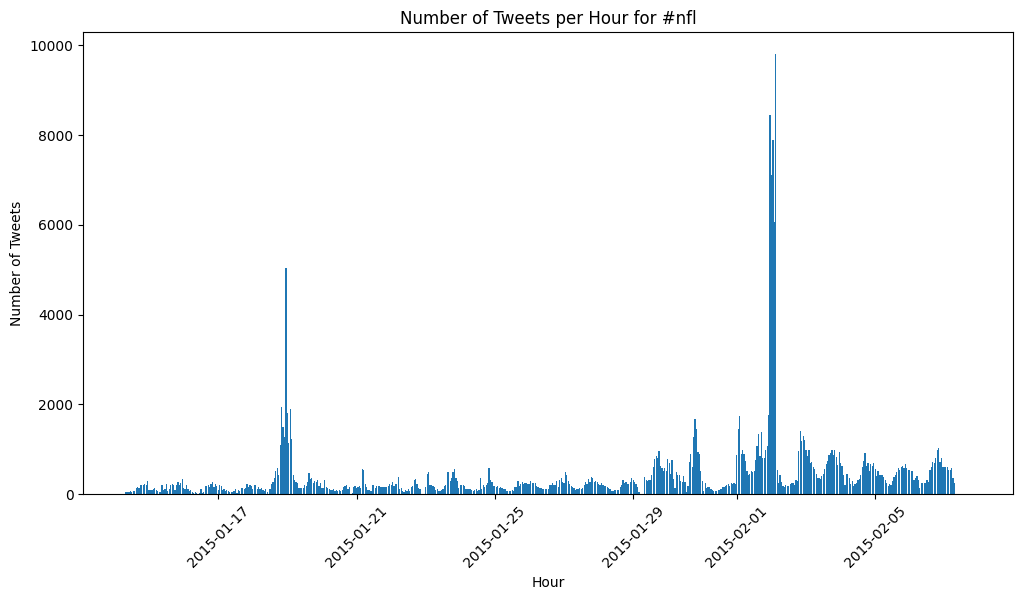

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(hours, tweet_counts, width=0.035)
plt.title('Number of Tweets per Hour for #nfl')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)

**<font color=blue size=4>Question 9.2**

**Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with
1-hour bins). The tweets are stored in separate files for different hashtags and files are
named as tweet [#hashtag].txt.**

We plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with 1-hour bins). You can see the results above. For superbowl, the number of tweets will increase a lot in a specific time, and the number of tweets in other time is very low. For NFL, the number of tweets also increase a lot during two specific time and decrease during other time. At the same time, both of them have the highet number of tweets, which suggests that it might have been Super Bowl day.

## Question 10

### Task 1: Predict the hashtags based on the tweets

In [ ]:
import re
import json
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score
from sklearn.decomposition import TruncatedSVD

In [ ]:
def remove_hashtags(text):
  processed_texts = re.sub(r"#\S+", "", text)
  return processed_texts

def load_tweet_hashtag(files, sample_frac=1.0):
  data = []
  for file_name in files:
    with open(file_name, 'r', encoding='utf-8') as file:
      for line in file:
        chance = random.random()
        if chance > sample_frac:
          continue

        tweet = json.loads(line)
        tweet_text = remove_hashtags(tweet['tweet']['text'])
        if tweet_text == '':
          continue
        hashtags = [hashtag['text'] for hashtag in tweet['tweet']['entities']['hashtags']]
        #like_count = tweet['tweet']['favorite_count']
        #retweet_count = tweet['tweet']['retweet_count']
        data.append({
                    'text': tweet_text,
                    'hashtags': hashtags
                })

  return data

In [ ]:
def calculate_accuracy_precision_per_tweet(Y_test, Y_pred):
    accuracies = []
    precisions = []

    for true_labels, pred_labels in zip(Y_test, Y_pred):
        total_labels = np.sum(true_labels)
        total_preds = np.sum(pred_labels)
        correct_predictions = np.sum([(a == 1) and (b == 1) for a,b in zip(true_labels, pred_labels)])
        if total_labels == 0:
          accuracy = 0
        else:
          accuracy = (correct_predictions / total_labels) * 100
        accuracies.append(accuracy)

        if total_preds == 0:
          precision = 0
        else:
          precision = (correct_predictions / total_preds) * 100
        #precision_score(true_labels, pred_labels, average='binary', zero_division=0) * 100
        precisions.append(precision)

    metrics = list(zip(accuracies, precisions))
    return metrics

In [ ]:
files = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
         'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

data = load_tweet_hashtag(files, sample_frac=0.005)

In [ ]:
len(data)

14092

In [ ]:
texts = [d['text'] for d in data]
hashtags = [d['hashtags'] for d in data]

#### Exploratory Data

Text(0.5, 1.0, 'Distribution of the number of hashtags per tweet')

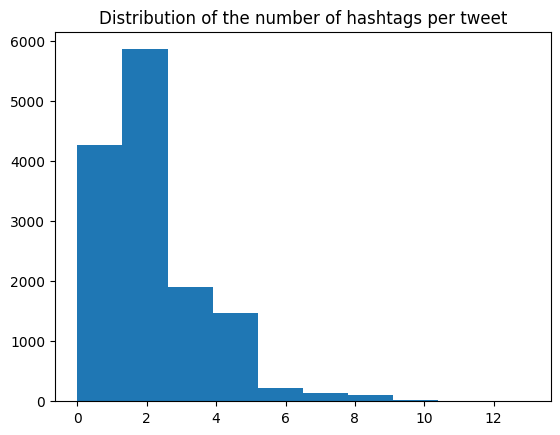

In [ ]:
hashtags_len = [len(x) for x in hashtags]
plt.hist(hashtags_len)
plt.title('Distribution of the number of hashtags per tweet')

#### Feature Engineering

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(texts)

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(hashtags)

In [ ]:
svd = TruncatedSVD(n_components=200, n_iter=5, random_state=42)
X_svd = svd.fit_transform(X)

#### Baseline Model

In [ ]:
# baseline model
X_train, X_test, Y_train, Y_test = train_test_split(X_svd, Y, test_size=0.2, random_state=42)

classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))

classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
results = calculate_accuracy_precision_per_tweet(Y_test, Y_pred)

print(f'The average accuracy of the hashtags prediction is {np.mean(results, axis = 0)[0]} %.')
print(f'The average precision of the hashtags prediction is {np.mean(results, axis = 0)[1]} %.')

The average accuracy of the hashtags prediction is 23.11681153943059 %.
The average precision of the hashtags prediction is 21.06607017321298 %.


#### More Feature Engineering

In [ ]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 862.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
X_embeddings = model.encode(texts)
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(hashtags)

In [ ]:
X_embeddings.shape

(14092, 384)

#### Final Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_embeddings, Y, test_size=0.2, random_state=42)

classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42))

classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
results = calculate_accuracy_precision_per_tweet(Y_test, Y_pred)

print(f'The average accuracy of the hashtags prediction is {np.mean(results, axis = 0)[0]} %.')
print(f'The average precision of the hashtags prediction is {np.mean(results, axis = 0)[1]} %.')

The average accuracy of the hashtags prediction is 54.06382402036888 %.
The average precision of the hashtags prediction is 37.43746797380219 %.


**<font color=blue size=4>Task 1**

**Describe your task.**

Our task is to predict the hashtags based on the tweets. For example, we are given a tweet, and we will use the text of the tweet to predict the hashtags of the tweet.

**Explore the data and any metadata.**

We first looked at the raw data and we found that each piece of data would contain these keys: 'firstpost_date', 'title', 'url', 'tweet', 'author', 'original_author', 'citation_date', 'metrics', ' highlight', 'type', and 'citation_url'. Each key contains a corresponding value, and even one key can contain another key. e.g. 'tweet' contains 'user' and 'author ' and so on. Then we explored the distribution of the number of hashtags per tweet.
We found that most of the tweets have between 1 and 3 hashtags, and very few have more than 4. You can see the results in the graph above.

**Describe the feature engineering process. Implement it with reason: Why are you extracting features this way - why not in any other way?**

We subsample the data using sample_frac=0.005. Because the dataset is too large. The text of each tweet contains the hashtags, and we removed these hashtgas firstly and then only use the text to predict the hashtags. The reason we remove hashtags is if we use the text contains hashtags to predict the hashtags, it will become a matter of contrast. It will lead to predictions that come out with a very high accuracy rate, close to 100 percent, but in reality it can't be that high. It makes sense to remove hashtags before making a prediction. For baseline model, we firstly use TfidfVectorizer to convert a collection of raw texts into a matrix of TF-IDF features with stop_words=english. Then we perform dimensionality reduction using TruncatedSVD(n_components=200, n_iter=5, random_state=42). Then we use MultiLabelBinarizer to convert multiple labels per instance into a binary format. For final model, we use SentenceTransformer instead of TfidfVectorizer, and we still use MultiLabelBinarizer to convert multiple labels per instance into a binary format.

**Baseline Model**

For the baseline model, we use RandomForest as our baseline model with parameters (n_estimators=100, class_weight='balanced', random_state=42). We add class_weight=balanced because the dataset is highly imbalanced with respect to fan distribution.

**Final Model**

For the final model, we use RandomForest as our final model with parameters (n_estimators=100, max_depth=5, class_weight='balanced', random_state=42). We add max_depth=5 here. The difference between final model nd baseline model is we use sentencetransformer instead of TFIDF.

**Evaluation**

We use average accuracy of the hashtags prediction and average precision of the hashtags prediction to evaluate. We are more interested in predicting hashtags that appeared in the tweets rather than predicting hashtags that do not, so we evaluate our models based on the percentage of correctly predicted hashtags in true labels (accuracy) and in prediction (precision).

For the basline model:

*   The average accuracy of the hashtags prediction is 23.11681153943059 %.

*   The average precision of the hashtags prediction is 21.06607017321298 %.

For the final model:

*   The average accuracy of the hashtags prediction is 54.06382402036888 %.

*   The average precision of the hashtags prediction is 37.43746797380219 %.

You can see that there is a huge improve for both accuracy and precision.






### Task 2: Predict Retweet and Like Count

#### Explore Data

In [ ]:
def load_tweet_count(files, sample_frac=1.0):
  hashtag_dict = dict(zip(files, range(0, 6)))
  data = []
  for file_name in files:
    with open(file_name, 'r', encoding='utf-8') as file:
      for line in file:
        chance = random.random()
        if chance > sample_frac:
          continue

        tweet = json.loads(line)
        hashtags_number = len([hashtag['text'] for hashtag in tweet['tweet']['entities']['hashtags']])
        user_followers_count = tweet['tweet']['user']['followers_count']
        user_friends_count = tweet['tweet']['user']['friends_count']
        #metrics_acceleration = tweet['metrics']['acceleration']
        like_count = tweet['tweet']['favorite_count']
        retweet_count = tweet['tweet']['retweet_count']
        hashtags_ohe = [0, 0, 0, 0, 0, 0]
        hashtags_ohe[hashtag_dict[file_name]] = 1
        data.append({
                    'hashtags': hashtags_number,
                    'user_followers_count': user_followers_count,
                    'user_friends_count': user_friends_count,
                    'like_count': like_count,
                    'retweet_count': retweet_count,
                    'file_name': hashtags_ohe

                })

  return data

In [ ]:
files = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt',
         'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

data = load_tweet_count(files, sample_frac=0.1)

In [ ]:
len(data)

283114

In [ ]:
X = [[d['hashtags'],d['user_followers_count'],d['user_friends_count']] for d in data]
hashtags_dummy = [d['file_name'] for d in data]
like = [d['like_count'] for d in data]
retweet = [d['retweet_count'] for d in data]

In [ ]:
X = [x + d for x, d in zip(X, hashtags_dummy)]

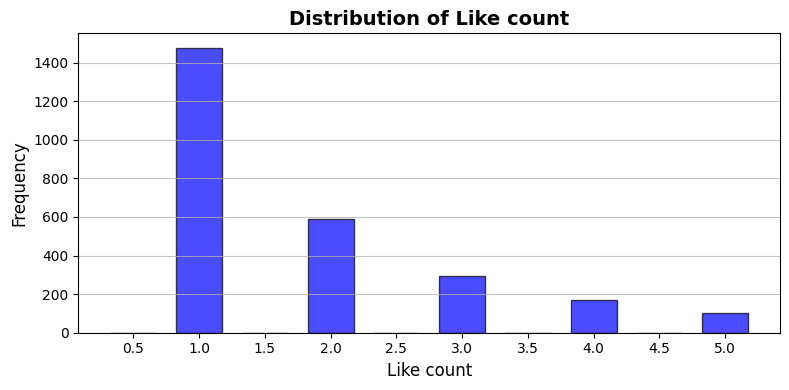

In [ ]:
bin_edges = np.linspace(0.5, 5.5, num=11)

plt.figure(figsize=(8, 4))
n, bins_out, patches = plt.hist(like, bins=bin_edges, color='blue', rwidth=0.7, align='left', edgecolor='black', alpha=0.7)

plt.xticks(ticks=np.arange(0.5, 5.5, 0.5), labels=np.arange(0.5, 5.5, 0.5))

plt.xlabel('Like count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Like count', fontsize=14, fontweight='bold')

plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

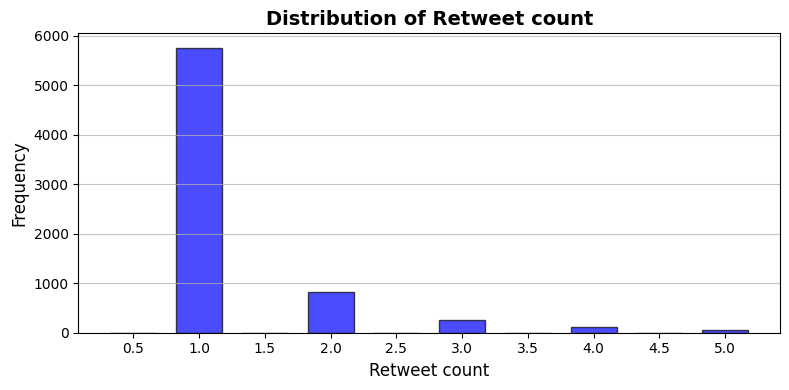

In [ ]:
bin_edges = np.linspace(0.5, 5.5, num=11)

plt.figure(figsize=(8, 4))
n, bins_out, patches = plt.hist(retweet, bins=bin_edges, color='blue', rwidth=0.7, align='left', edgecolor='black', alpha=0.7)

plt.xticks(ticks=np.arange(0.5, 5.5, 0.5), labels=np.arange(0.5, 5.5, 0.5))

plt.xlabel('Retweet count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Retweet count', fontsize=14, fontweight='bold')

plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

#### Baseline Model: Linear Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
ols_like = linear_model.LinearRegression()
ols_retweet = linear_model.LinearRegression()

X = np.array(X)
y_like = np.array(like)
y_retweet = np.array(retweet)

In [ ]:
kf = KFold(n_splits=10, shuffle = True, random_state = 42)
train_rmse_ols_like = []
test_rmse_ols_like = []
train_rmse_ols_retweet = []
test_rmse_ols_retweet = []

for train_index, test_index in kf.split(X):
  ols_like.fit(X[train_index], y_like[train_index])
  y_preds_ols_like_test = ols_like.predict(X[test_index])
  y_preds_ols_like_train = ols_like.predict(X[train_index])
  train_rmse_ols_like.append(mean_squared_error(y_pred=y_preds_ols_like_train, y_true=y_like[train_index], squared = False))
  test_rmse_ols_like.append(mean_squared_error(y_pred=y_preds_ols_like_test, y_true=y_like[test_index], squared = False))

  ols_retweet.fit(X[train_index], y_retweet[train_index])
  y_preds_ols_retweet_test = ols_retweet.predict(X[test_index])
  y_preds_ols_retweet_train = ols_retweet.predict(X[train_index])
  train_rmse_ols_retweet.append(mean_squared_error(y_pred=y_preds_ols_retweet_train, y_true=y_like[train_index], squared = False))
  test_rmse_ols_retweet.append(mean_squared_error(y_pred=y_preds_ols_retweet_test, y_true=y_like[test_index], squared = False))

In [ ]:
print('Predicting like count: OLS averge training set RMSE: ', np.mean(train_rmse_ols_like))
print('Predicting like count: OLS averge test set RMSE: ', np.mean(test_rmse_ols_like))
print('--------------------------------------')
print('Predicting retweet count: OLS averge training set RMSE: ', np.mean(train_rmse_ols_retweet))
print('Predicting retweet count: OLS averge test set RMSE: ', np.mean(test_rmse_ols_retweet))

Predicting like count: OLS averge training set RMSE:  15.255400716355766
Predicting like count: OLS averge test set RMSE:  10.78155126390512
--------------------------------------
Predicting retweet count: OLS averge training set RMSE:  15.25559567768561
Predicting retweet count: OLS averge test set RMSE:  10.780041029536545


#### More Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = np.array([[d['hashtags'],d['user_followers_count'],d['user_friends_count']] for d in data])
X_std = scaler.fit_transform(X)

In [ ]:
X_std = X = np.array([x + d for x, d in zip(X_std.tolist(), hashtags_dummy)])

#### Final Model

In [ ]:
# Predicting like counts
X_train, X_test, y_train, y_test = train_test_split(X_std, y_like, test_size=0.2, random_state=42)
lgbm = lgb.LGBMRegressor()

search_spaces = {
    'num_leaves': Integer(20, 60),
    'max_depth': Integer(3, 7),
    'learning_rate': Real(0.01, 0.2, 'uniform'),
    'n_estimators': Integer(100, 300),
    'min_child_samples': Integer(10, 30),
}

opt = BayesSearchCV(
    estimator=lgbm,
    search_spaces=search_spaces,
    n_iter=32,
    scoring='neg_root_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1,
    refit=True,
    random_state=42
)

opt.fit(X_train, y_train)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

BayesSearchCV(cv=10, estimator=LGBMRegressor(), n_iter=32, n_jobs=-1,
              random_state=42, scoring='neg_root_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.01, high=0.2, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=7, prior='uniform', transform='normalize'),
                             'min_child_samples': Integer(low=10, high=30, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=20, high=60, prior='uniform', transform='normalize')},
              verbose=1)

In [ ]:
from sklearn.metrics import mean_squared_error
print(f"Best hyperparameters for predicting like count: {opt.best_params_}")

y_pred = opt.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Predicting like counts: Corresponding RMSE: {rmse}")

Best hyperparameters for predicting like count: OrderedDict([('learning_rate', 0.01), ('max_depth', 7), ('min_child_samples', 19), ('n_estimators', 100), ('num_leaves', 20)])
Predicting like counts: Corresponding RMSE: 5.682218191837435


In [ ]:
# Predicting retweet counts
X_train, X_test, y_train, y_test = train_test_split(X_std, y_retweet, test_size=0.2, random_state=42)
lgbm = lgb.LGBMRegressor()

search_spaces = {
    'num_leaves': Integer(20, 60),
    'max_depth': Integer(3, 7),
    'learning_rate': Real(0.01, 0.2, 'uniform'),
    'n_estimators': Integer(100, 300),
    'min_child_samples': Integer(10, 30),
}

opt = BayesSearchCV(
    estimator=lgbm,
    search_spaces=search_spaces,
    n_iter=32,
    scoring='neg_root_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1,
    refit=True,
    random_state=42
)

opt.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

BayesSearchCV(cv=10, estimator=LGBMRegressor(), n_iter=32, n_jobs=-1,
              random_state=42, scoring='neg_root_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.01, high=0.2, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=7, prior='uniform', transform='normalize'),
                             'min_child_samples': Integer(low=10, high=30, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=20, high=60, prior='uniform', transform='normalize')},
              verbose=1)

In [ ]:
print(f"Best hyperparameters for predicting retweet count: {opt.best_params_}")

y_pred = opt.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Predicting retweet counts: Corresponding RMSE: {rmse}")

Best hyperparameters for predicting retweet count: OrderedDict([('learning_rate', 0.01), ('max_depth', 3), ('min_child_samples', 30), ('n_estimators', 100), ('num_leaves', 20)])
Predicting retweet counts: Corresponding RMSE: 4.493061081079482


**<font color=blue size=4>Task 2**

**Describe your task.**

Our task is to predict the retweet count and like count given a  tweet. For example, we are given a tweet, we will use the number of hashtags, the file name (hashtags), the users' followers count, and the users' friends count to predict the retweet and like count.

**Explore the data and any metadata.**

We first looked at the raw data and we found that each piece of data would contain these keys: 'firstpost_date', 'title', 'url', 'tweet', 'author', 'original_author', 'citation_date', 'metrics', ' highlight', 'type', and 'citation_url'. Each key contains a corresponding value, and even one key can contain another key. e.g. 'tweet' contains 'user' and 'author ' and so on. Then we explore the distribution of like count and retweet count. We found that the like count for most of tweets are 1 or 2. And the retweet count for most of tweets are also 1 or 2. You can see the results in the graph above.

**Describe the feature engineering process. Implement it with reason: Why are you extracting features this way - why not in any other way?**

We also subsample the data using sample_frac=0.1. Because the dataset is too large. And when the data loading part, we perform the one hot encoding on the file name features (hashtags). Because there are categorical value, and we need to transform to numerical value. Also, we use StandardScaler to standardizes features. It computes the mean and standard deviation of each feature (column) in the feature matrix X and scales the features to have zero mean and unit variance. And then returns the standardized features as X_std. Standardizing features is important because it ensures that all features contribute equally to the distance computations in many machine learning algorithms.

**Baseline Model**

For the baseline model, we use linear regression as our baseline model.

**Final Model**

For the final model, we use lightGBM regression as our final model. We also perform GridSearch for the model.

**Evaluation**

We use the averge RMSE score to evaluate. You can see the results above. For the baseline model:

* OLS averge training set RMSE (Predicting like count) =  15.255400716355766
* OLS averge test set RMSE (Predicting like count) =  10.78155126390512
* OLS averge training set RMSE (Predicting retweet count) =  15.25559567768561
* OLS averge test set RMSE (Predicting retweet count) =  10.780041029536545

For the final model, after perform the GridSearch, we found the the best hyperparameters for predicting like count:
* learning_rate = 0.01
* max_depth = 7
* min_child_samples = 19
* n_estimators = 100
* num_leaves = 20

And the corresponding RMSE:
* RMSE = 5.682218191837435


For the final model, after perform the GridSearch, we found the the best hyperparameters for predicting retweet count:
* learning_rate = 0.01
* max_depth = 3
* min_child_samples = 30
* n_estimators = 100
* num_leaves = 20

And the corresponding RMSE:
* RMSE = 4.493061081079482

You can find that the performance improve a lot for the final model compare to the baseline model.










### Task 3: Predict tweet sentiment score for both teams' fan from tweet citation datetime

In [ ]:
import pytz
import datetime
pst_tz = pytz.timezone('America/Los_Angeles')

In [ ]:
def load_tweet_data(files, sample_frac=1.0):
  data = []
  for file_name in files:
    if 'hawks' in file_name:
      team = 'seahawks'
    else:
      team = 'patriots'
    with open(file_name, 'r', encoding='utf-8') as file:
      for line in file:
        chance = random.random()
        if chance > sample_frac:
          continue

        tweet = json.loads(line)
        data.append({
                    'text': tweet['tweet']['text'],
                    'datetime': datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz),
                    'team': team
                    })

  return data

In [ ]:
files = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt']
data = load_tweet_data(files, sample_frac=0.5)
len(data)

95961

#### Define Sentiment Score

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as stm
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
analyzer = stm()
for d in data:
  d['score'] = analyzer.polarity_scores(d['text'])['compound']

In [ ]:
data_df = pd.DataFrame(data)
data_df.head()

,text,datetime,team,score
0,I &lt;3 our defense! #GoHawks http://t.co/U1pc...,2015-01-17 10:19:38-08:00,seahawks,0.2003
1,twelfth dogs are ready! #gohawks #dogslife htt...,2015-01-14 10:18:56-08:00,seahawks,0.4199
2,"""Oh no big deal, just NFC West Champs and the ...",2015-01-16 20:21:59-08:00,seahawks,-0.5473
3,At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...,2015-01-16 20:21:37-08:00,seahawks,0.0000
4,"Good luck at Michigan, Jim Harbaugh. #GoHawks ...",2015-01-16 20:18:56-08:00,seahawks,0.7096


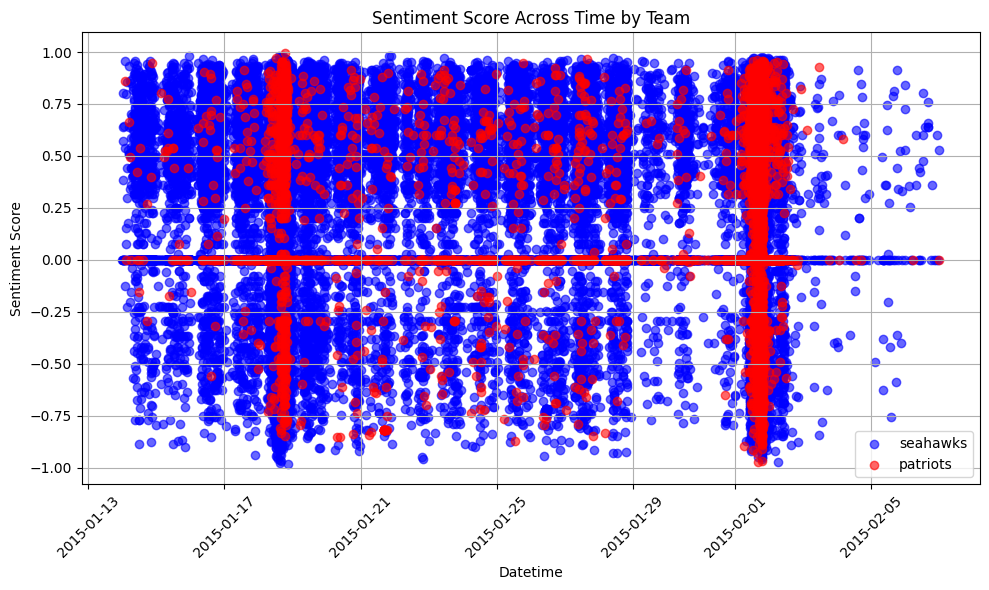

In [ ]:
data_df.sort_values('datetime', inplace=True)

teams = data_df['team'].unique()
colors = ['blue', 'red']

plt.figure(figsize=(10, 6))

for team, color in zip(teams, colors):
    team_data = data_df[data_df['team'] == team]
    plt.scatter(team_data['datetime'], team_data['score'], label=team, color=color, alpha=0.6)

plt.title('Sentiment Score Across Time by Team')
plt.xlabel('Datetime')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

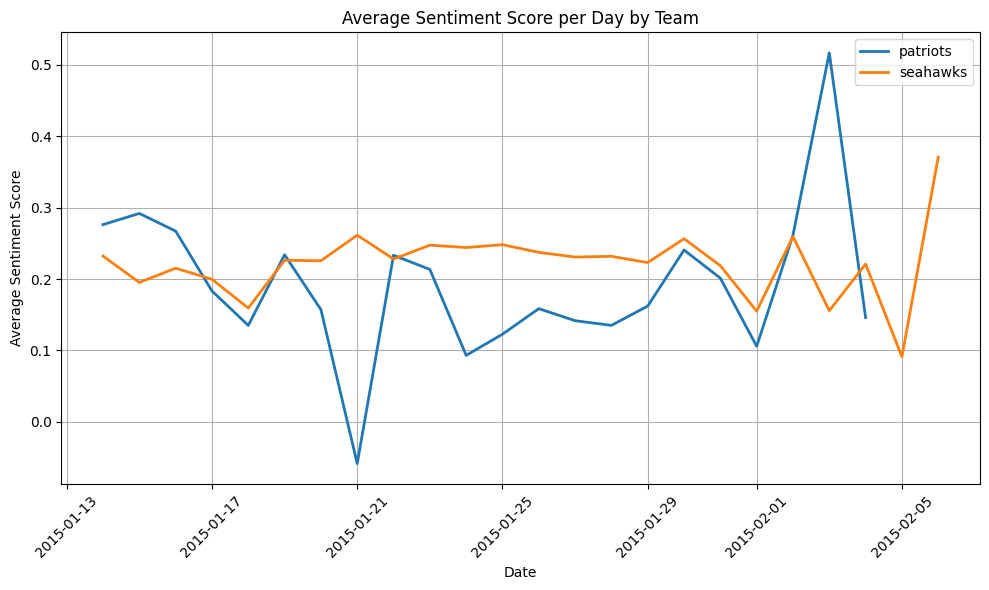

In [ ]:
data_df['datetime'] = pd.to_datetime(data_df['datetime'])

data_df['date'] = data_df['datetime'].dt.date

grouped_scores = data_df.groupby(['team', 'date'])['score'].mean().reset_index()

pivot_df = grouped_scores.pivot(index='date', columns='team', values='score')

plt.figure(figsize=(10, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='', linewidth=2, label=column)

plt.title('Average Sentiment Score per Day by Team')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Feature Engineering

In [ ]:
X = data_df[['datetime', 'team']]
y = data_df['score']

In [ ]:
def get_time_frame(dt):
    hour = dt.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

def calculate_day_count(df, date_column):
    start_date = df[date_column].min()
    df['day_count'] = (df[date_column] - start_date).dt.days
    return df

X['team'] = X['team'].apply(lambda x: 1 if x == 'patriots' else 0)

X['datetime'] = pd.to_datetime(X['datetime'])
X['year'] = X['datetime'].dt.year
X['month'] = X['datetime'].dt.month
X['day'] = X['datetime'].dt.day
X['hour'] = X['datetime'].dt.hour
X['dayofweek'] = X['datetime'].dt.dayofweek
X['team'] = X['team'].apply(lambda x: 1 if x == 'patriots' else 0)

# Create 'time_frame' column from 'datetime' column
X['time_frame'] = X['datetime'].apply(get_time_frame)

# One-hot encode 'time_frame' column
X = pd.concat([X, pd.get_dummies(X['time_frame'], prefix='time_frame')], axis=1)

# Create 'day_count' column from 'datetime' column
X = calculate_day_count(X, 'datetime')

# Optionally, drop the original 'team' and 'time_frame' columns if you don't need them
X.drop(['time_frame', 'datetime'], axis=1, inplace=True)

X.head()

<ipython-input-21-c00971d4330b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['team'] = X['team'].apply(lambda x: 1 if x == 'patriots' else 0)
<ipython-input-21-c00971d4330b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = pd.to_datetime(X['datetime'])
<ipython-input-21-c00971d4330b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,team,year,month,day,hour,dayofweek,time_frame_Afternoon,time_frame_Evening,time_frame_Morning,day_count
106,0,2015,1,14,0,2,0,1,0,0
72,0,2015,1,14,0,2,0,1,0,0
107,0,2015,1,14,0,2,0,1,0,0
96,0,2015,1,14,0,2,0,1,0,0
108,0,2015,1,14,0,2,0,1,0,0


#### Baseline Model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.3722151842261623


#### Final Model

In [ ]:
# Predicting sentiment score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lgbm = lgb.LGBMRegressor()

search_spaces = {
    'num_leaves': Integer(20, 60),
    'max_depth': Integer(3, 7),
    'learning_rate': Real(0.01, 0.2, 'uniform'),
    'n_estimators': Integer(100, 300),
    'min_child_samples': Integer(10, 30),
}

opt = BayesSearchCV(
    estimator=lgbm,
    search_spaces=search_spaces,
    n_iter=32,
    scoring='neg_root_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=1,
    refit=True,
    random_state=42
)

opt.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

BayesSearchCV(cv=10, estimator=LGBMRegressor(), n_iter=32, n_jobs=-1,
              random_state=42, scoring='neg_root_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.01, high=0.2, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=7, prior='uniform', transform='normalize'),
                             'min_child_samples': Integer(low=10, high=30, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=20, high=60, prior='uniform', transform='normalize')},
              verbose=1)

In [ ]:
print(f"Best hyperparameters for predicting retweet count: {opt.best_params_}")

y_pred = opt.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Predicting retweet counts: Corresponding RMSE: {rmse}")

Best hyperparameters for predicting retweet count: OrderedDict([('learning_rate', 0.2), ('max_depth', 3), ('min_child_samples', 25), ('n_estimators', 100), ('num_leaves', 53)])
Predicting retweet counts: Corresponding RMSE: 0.3710292292285751


**<font color=blue size=4>Task 3**

**Describe your task.**

Our task is to predict tweet sentiment score for both teams' fan from tweet citation datetime. For example, we are given a tweet, we will use the time a tweet is posted and the team information to predict sentiment score.

**Explore the data and any metadata.**

We first looked at the raw data and we found that each piece of data would contain these keys: 'firstpost_date', 'title', 'url', 'tweet', 'author', 'original_author', 'citation_date', 'metrics', ' highlight', 'type', and 'citation_url'. Each key contains a corresponding value, and even one key can contain another key. e.g. 'tweet' contains 'user' and 'author ' and so on. Then we explore the sentiment score scross time by team and average sentiment score per day by team. We found that the average sentiment score for seahawks was consistently higher than patriots until 2/1/2015. But after Feb. 1 patriots average sentiment score suddenly increased dramatically and surpassed patriots. This may have something to do with the outcome of the game. Because patriots won the competition, after February 1, users posted a lot of posts about the victory, and all of them were positive. This may have contributed to the large increase in average sentiment score.

**Describe the feature engineering process. Implement it with reason: Why are you extracting features this way - why not in any other way?**

We also subsample the data using sample_frac=0.5. Because the dataset is too large. Then we perform the following:

* One-hot encoding transforms categorical data into a format that can be provided to ML algorithms to do a better job in prediction.

* Creating a 'time_frame' column from the datetime data is feature engineering because you're converting a timestamp into a categorical feature that represents a meaningful time of day, which may have a different impact on the model's outcome.

* One-hot encoding the 'time_frame' column further allows these categorical representations to be used in machine learning models, as they typically require numerical input.

* Creating a 'day_count' column is also feature engineering. By counting the number of days since the start of the dataset, you create a numerical feature that may capture trends over time.

**Baseline Model**

For the baseline model, we use Random Forest Regression as our baseline Model with parameters n_estimators=100 and random_state=42.

**Final Model**

For the final model, we use lightGBM regression as our final model. We also perform GridSearch for the model.

**Evaluation**

We use the RMSE score to evaluate. You can see the results above. For the baseline model:

* Root Mean Squared Error: 0.3722151842261623

For the final model, after perform the GridSearch, we found the the best hyperparameters for predicting like count:
* learning_rate = 0.2
* max_depth = 3
* min_child_samples = 25
* n_estimators = 100
* num_leaves = 53

And the corresponding RMSE:
* RMSE = 0.3710292292285751

You can find that the performance improve a little for the final model compare to the baseline model.








